<a href="https://colab.research.google.com/github/arthurvaz05/Python.Script/blob/master/Grafo_RSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [12]:
#Extrair os dataset através desse site -> https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/All_Beauty.json.gz

--2023-05-13 13:45:10--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/All_Beauty.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47350910 (45M) [application/x-gzip]
Saving to: ‘All_Beauty.json.gz’

All_Beauty.json.gz  100%[===================>]  45.16M   176MB/s    in 0.3s    

2023-05-13 13:45:11 (176 MB/s) - ‘All_Beauty.json.gz’ saved [47350910/47350910]



In [13]:
#Habilitar o acesso ao meu drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Verificar onde o metadado se encontra no meu drive
#!ls /content/drive/MyDrive/meta_All_Beauty.json.gz

In [15]:
### carregar os dados

data_meta = []
with gzip.open('/content/drive/MyDrive/meta_All_Beauty.json.gz') as f:
    for l in f:
        data_meta.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data_meta))

# first row of the list
print(data_meta[0])

32892
{'category': [], 'tech1': '', 'description': ["Loud 'N Clear Personal Sound Amplifier allows you to turn up the volume on what people around you are saying, listen at the level you want without disturbing others, hear a pin drop from across the room."], 'fit': '', 'title': "Loud 'N Clear&trade; Personal Sound Amplifier", 'also_buy': [], 'tech2': '', 'brand': 'idea village', 'feature': [], 'rank': '2,938,573 in Beauty & Personal Care (', 'also_view': [], 'details': {'ASIN: ': '6546546450'}, 'main_cat': 'All Beauty', 'similar_item': '', 'date': '', 'price': '', 'asin': '6546546450', 'imageURL': [], 'imageURLHighRes': []}


In [16]:
### carregar os dados

data = []
with gzip.open('All_Beauty.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

371345
{'overall': 1.0, 'verified': True, 'reviewTime': '02 19, 2015', 'reviewerID': 'A1V6B6TNIC10QE', 'asin': '0143026860', 'reviewerName': 'theodore j bigham', 'reviewText': 'great', 'summary': 'One Star', 'unixReviewTime': 1424304000}


In [18]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)
df_meta = pd.DataFrame.from_dict(data_meta)

print(len(df))
print(len(df_meta))

371345
32892


In [20]:
df = df.fillna('')
df_meta = df_meta.fillna('')

In [ ]:
#df.head(5)

In [ ]:
#df_meta.head(5)

In [26]:
df.dtypes

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object

In [27]:
df_meta.dtypes

category           object
tech1              object
description        object
fit                object
title              object
also_buy           object
tech2              object
brand              object
feature            object
rank               object
also_view          object
details            object
main_cat           object
similar_item       object
date               object
price              object
asin               object
imageURL           object
imageURLHighRes    object
dtype: object

In [32]:
df.loc[:,'likes'] = df.overall.map( lambda x: 1 if x >=4 else 0)

In [33]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import networkx as nx
import numpy as np

In [83]:
int(np.round(len(df)*0.0001,0))

33

In [76]:
df_sample = df.sample(n=(int(np.round(len(df)*0.0001,0))))

In [77]:
df_sample.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,likes
101357,5.0,True,"08 21, 2013",A1XITY3MKWT56S,B00567UTKI,ei,The price is good for the quality of this sham...,Baby Shampoo,1377043200,,"{'Size:': ' 8 oz', 'Scent Name:': ' Tropical B...",,1
54707,5.0,True,"04 16, 2018",A38G1S7F89NBDL,B0010ZBORW,Alexis M.,Theyre great for exfoliating. I used them Him...,Great for exfoliating,1523836800,,{'Color:': ' Exfoliating Gloves'},,1
346302,5.0,True,"03 5, 2018",A2Y79Y1S9KRQQB,B018KS3QUE,Andrew F. Clarke,this stuff works great on my Moses oral applia...,Kleenite works best,1520208000,,,,1
148133,4.0,True,"11 17, 2014",A1GJM6DGDB1QSC,B00EWUFETQ,Sophia,Received on schedule. My mom likes the product...,Received on schedule. My mom likes the product...,1416182400,2,,,1
258180,4.0,True,"04 17, 2017",ARFL3HPFI4RIA,B0007QKY6M,Barbara,Pretty color but it makes my eyes tear a bit.,Pretty color,1492387200,,{'Color:': ' Tan'},,1


In [87]:
G = nx.DiGraph(directed=True)
#Adicionando todos os vértices
G.add_nodes_from(pd.concat([df_sample.asin, df_sample.reviewerID], axis=0))
#Adicionando todas as arestas
G.add_edges_from(np.array(df_sample[df_sample.likes.eq(1)][['reviewerID', 'asin']]))

In [88]:
#um outro jeito de criar as arestas
#H = nx.from_pandas_edgelist(df, 
#                            source='reviewerID', 
#                            target='asin', 
#                            create_using=nx.Graph, 
#                            edge_attr='likes')

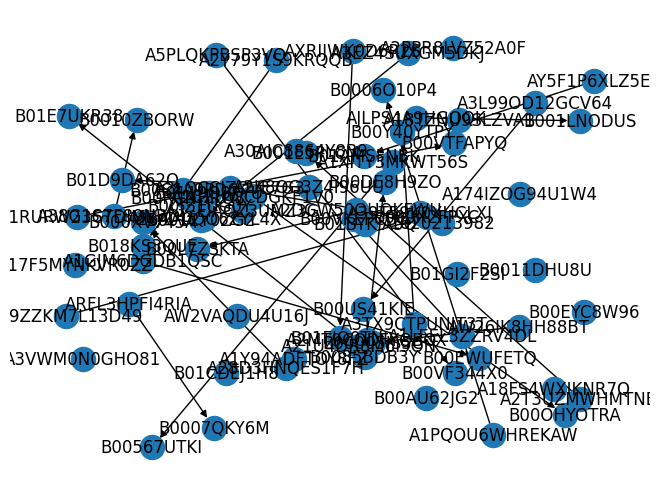

In [89]:
pos = nx.random_layout(G)
nx.draw(G, pos, with_labels = True)